In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix,classification_report ,r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Our data contains some important features of Bitcoin. 
#Data contains 2906 row and 24 columns.
#We are predicting the BTC market price by other valid features.

In [ ]:
#Reading csv file
url = 'https://drive.google.com/file/d/17h3zSBygGx1-Qj-xHneSF-mC4h3jKfbY/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)

In [ ]:
row_number = len(df)
column_number = len(df.columns)

print("Number of rows: "+str(row_number))
print("Number of columns:"+str(column_number))

display(df.head())

Number of rows: 2906
Number of columns:24


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
#Showing the information of our data. We have some null values and some of the types are different.
#We may change Date to usable format but we do not need it later of the notebook. 
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

None

In [ ]:
# Showing the sum of null values at columns in our data.
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [ ]:
# As this data set changes by date and there is just one day difference every neighbor rows, 
# We can fill null values with knn method and k equals 2 gives most efficient result.
imputer = KNNImputer(n_neighbors=2)

date = pd.DataFrame(df['Date'], columns= ['Date'])
df.drop("Date", axis=1, inplace =True)

df = df.drop(labels=range(0, 181), axis=0) #Dropped the range of rows because our Bitcoin price is become non zero days after it released. 
#Predicting zero values with other features is making the model equal train and test set score.

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.insert(0,"Date",date)

In [ ]:
# Checking if we have any null values.
df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [ ]:
#Dataframe after the dropped rows
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.076900,3744250.0,287932.8250,923.0018,1.0,0.000959,0.0,1.0,0.0,0.003333,511.773534,503.6950,0.67,13.567889,1.430952,393.0,352.0,104808.0,352.0,352.0,72855.15,48276.0,3712.0
1,2/18/2010,0.074000,3750900.0,277566.6000,206.7786,1.0,0.001973,0.0,1.0,0.0,0.003384,511.773534,492.1740,1.56,18.583081,1.305501,449.0,377.0,105185.0,377.0,377.0,52829.65,35791.0,2649.0
2,2/19/2010,0.068800,3757900.0,258543.5200,51.8784,1.0,0.000715,0.0,1.0,0.0,0.003562,511.773534,481.6000,0.00,50.886220,1.308696,395.0,368.0,105553.0,368.0,368.0,32027.42,13756.0,946.0
3,2/20/2010,0.066700,3766250.0,251208.8750,293.9825,1.0,0.000649,0.0,1.0,0.0,0.004249,511.773534,556.9450,0.00,39.493369,1.399359,433.0,398.0,105951.0,398.0,398.0,36647.52,21143.0,1410.0
4,2/21/2010,0.066899,3775450.0,252573.8296,731.0702,1.0,0.000528,0.0,1.0,0.0,0.004681,511.773534,615.4708,0.00,52.705028,1.768594,396.0,348.0,106299.0,348.0,348.0,33790.41,17456.0,1168.0


In [ ]:
#Correlation 
#1 means perfectly positive linear correlation and some of the columns like market cap has approximately 1 value correlation with market price.
#We understand that we need to be careful about that kind of values.
#As later explained we are droping the market cap column because of it is Price * Total supply
########################################################
#btc_miners_revenue = 0,98 with btc_market_price
#btc_estimated_transaction_volume_usd = 0,97 with btc_market_price 
#btc_hash_rate = 0,92 with btc_market_price 
#btc_difficulty = 0,91 with btc_market_price 
df.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.407143,0.999790,0.868398,0.672930,0.540288,-0.087787,0.540150,0.266102,0.920171,0.915455,0.986622,0.804455,-0.149197,0.815691,0.663540,0.566685,0.678543,0.554185,0.563322,0.097524,0.034630,0.968045
btc_total_bitcoins,0.407143,1.000000,0.400167,0.297386,0.806957,0.874866,0.259375,0.852461,0.600257,0.511789,0.522832,0.393118,0.479710,-0.619986,0.331881,0.844209,0.853470,0.809866,0.839465,0.822431,0.242792,0.143593,0.403921
btc_market_cap,0.999790,0.400167,1.000000,0.868852,0.671797,0.538369,-0.091664,0.538524,0.264186,0.921489,0.916716,0.985334,0.805228,-0.144820,0.806091,0.661017,0.564721,0.677180,0.552154,0.561545,0.098914,0.035869,0.968278
btc_trade_volume,0.868398,0.297386,0.868852,1.000000,0.520337,0.414110,-0.076960,0.428719,0.210451,0.757405,0.753008,0.874678,0.732701,-0.108389,0.691196,0.540675,0.452995,0.524881,0.440024,0.447970,0.087694,0.045143,0.895716
btc_blocks_size,0.672930,0.806957,0.671797,0.520337,1.000000,0.954920,0.031811,0.945023,0.478745,0.826289,0.840217,0.619123,0.740385,-0.336953,0.424212,0.965604,0.948731,0.999787,0.950154,0.959794,0.225009,0.121656,0.671270
btc_avg_block_size,0.540288,0.874866,0.538369,0.414110,0.954920,1.000000,0.123915,0.976389,0.515381,0.686334,0.703269,0.498758,0.646893,-0.401837,0.303760,0.965717,0.976426,0.952831,0.974871,0.967520,0.265389,0.152957,0.550529
btc_n_orphaned_blocks,-0.087787,0.259375,-0.091664,-0.076960,0.031811,0.123915,1.000000,0.089661,0.028036,-0.105613,-0.106760,-0.064116,-0.112046,-0.135442,-0.011238,0.099325,0.083241,0.031707,0.093068,0.049534,-0.025943,-0.001918,-0.091910
btc_n_transactions_per_block,0.540150,0.852461,0.538524,0.428719,0.945023,0.976389,0.089661,1.000000,0.521837,0.668341,0.690016,0.498427,0.665656,-0.391528,0.286008,0.964620,0.979442,0.942947,0.975130,0.973797,0.267459,0.150459,0.560836
btc_median_confirmation_time,0.266102,0.600257,0.264186,0.210451,0.478745,0.515381,0.028036,0.521837,1.000000,0.338987,0.363845,0.232899,0.401220,-0.507461,0.123090,0.474881,0.505317,0.483323,0.472344,0.500003,0.265839,0.160228,0.271944
btc_hash_rate,0.920171,0.511789,0.921489,0.757405,0.826289,0.686334,-0.105613,0.668341,0.338987,1.000000,0.989947,0.878239,0.806055,-0.186610,0.690850,0.769845,0.698364,0.830101,0.689605,0.710157,0.145916,0.063559,0.886922


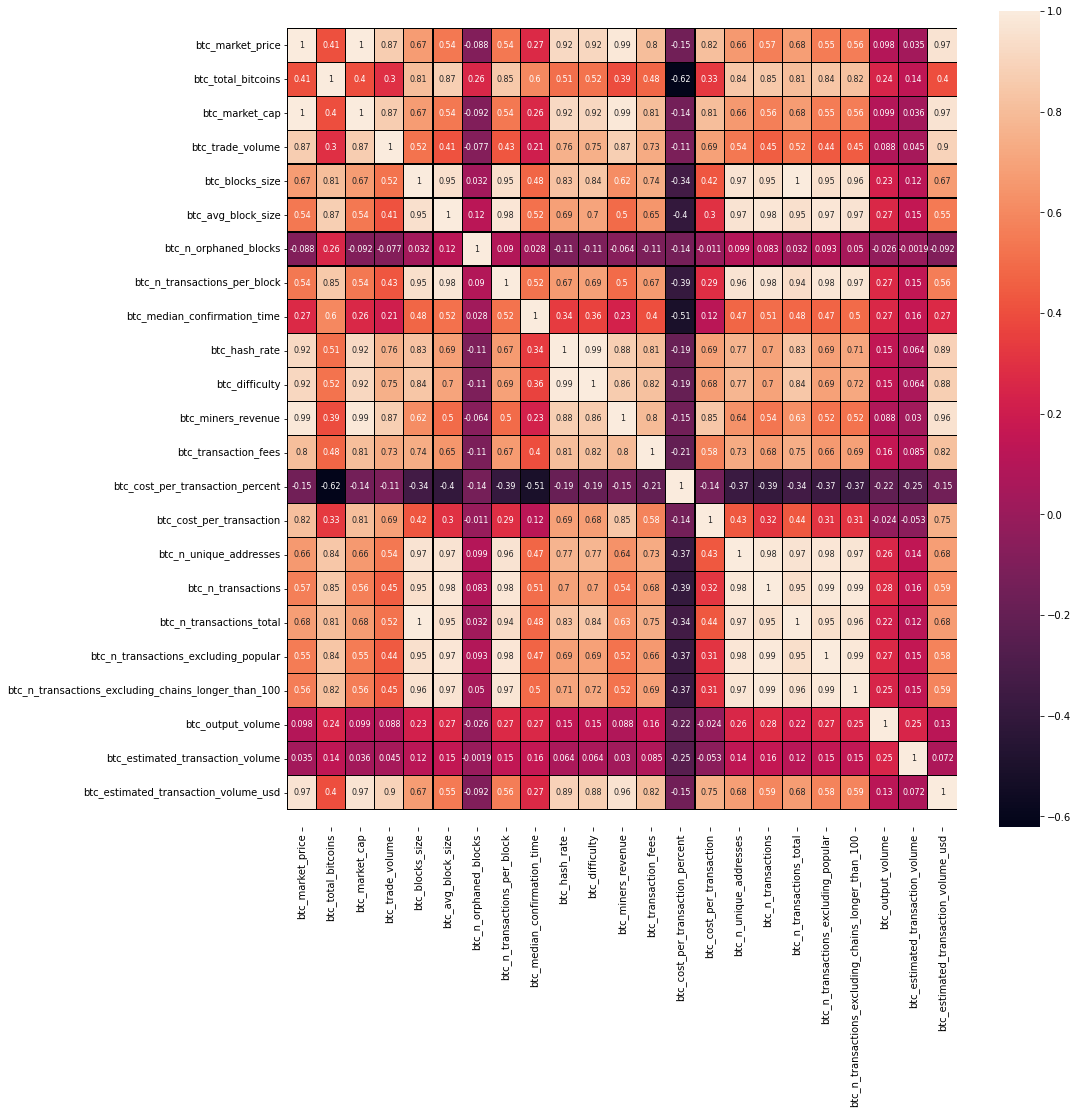

In [ ]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(correlation_matrix, annot=True,linewidths =.1,linecolor='black',annot_kws={"size":8},ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)
plt.show()

In [ ]:
scaler = MinMaxScaler()
df1 = df.drop("Date", axis = 1, inplace = False)

Y = df1['btc_market_price']
X = df1.drop('btc_market_price', axis = 1, inplace = False)

# We dropped market cap because market cap is multiple of market price
X.drop('btc_market_cap', axis = 1, inplace = True)
scaled = scaler.fit_transform(X)
display(scaled)

array([[0.00000000e+00, 1.64786332e-07, 0.00000000e+00, ...,
        1.20136576e-03, 7.22737932e-03, 5.52927896e-07],
       [5.07888016e-04, 3.09632513e-08, 0.00000000e+00, ...,
        7.65788288e-04, 5.08176451e-03, 3.68387126e-07],
       [1.04250698e-03, 2.02084617e-09, 0.00000000e+00, ...,
        3.13316050e-04, 1.29493052e-03, 7.27399650e-08],
       ...,
       [9.99728872e-01, 1.14184964e-01, 9.98142201e-01, ...,
        4.18367104e-02, 2.65235982e-02, 3.12534923e-01],
       [9.99888303e-01, 2.36599479e-01, 9.99209994e-01, ...,
        5.09422255e-02, 2.86199077e-02, 3.05430645e-01],
       [1.00000000e+00, 1.74371644e-01, 1.00000000e+00, ...,
        3.84578802e-02, 2.64049533e-02, 2.81005131e-01]])

For better vizulation plotting all histogram graphs as ordered.Only missing column is Date


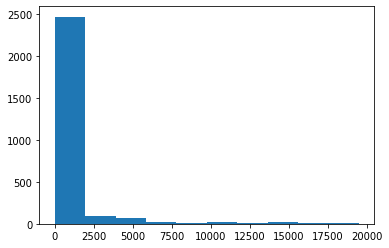

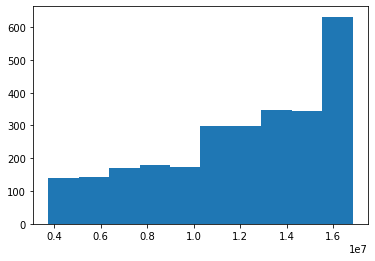

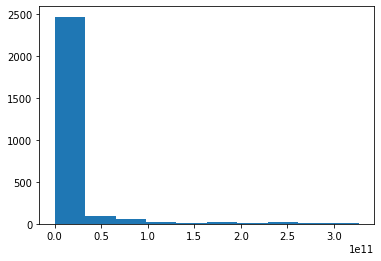

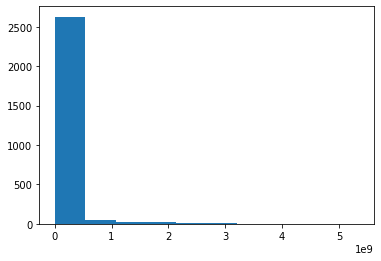

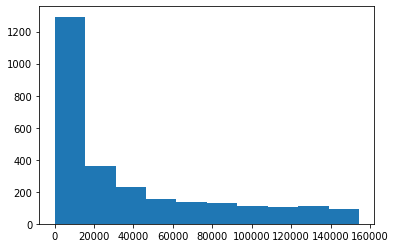

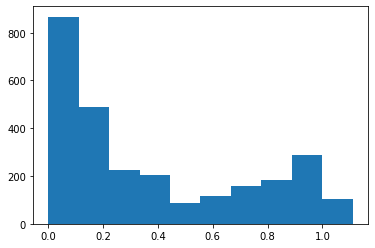

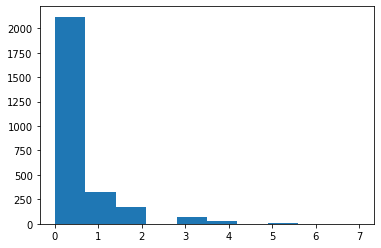

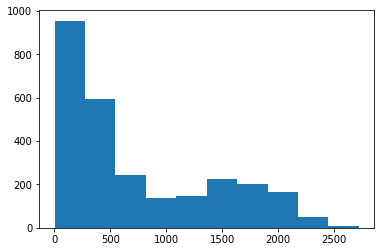

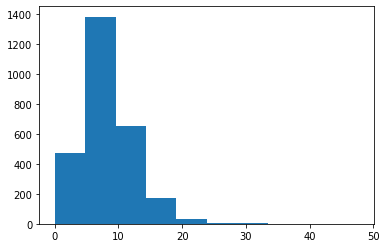

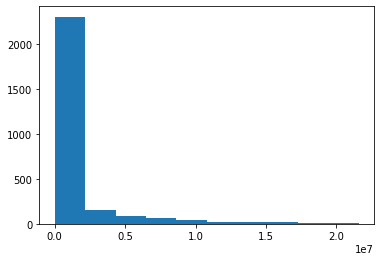

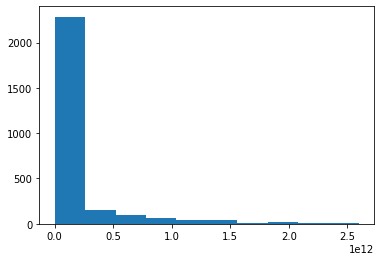

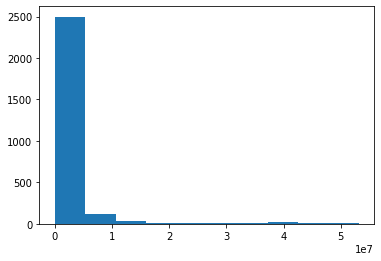

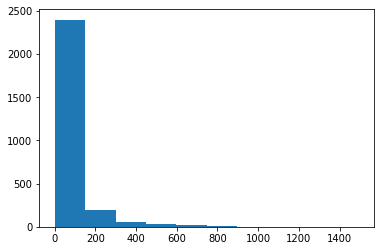

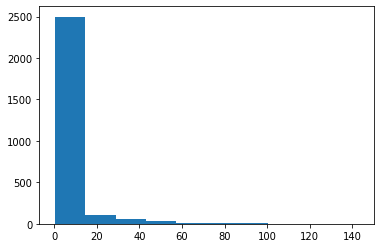

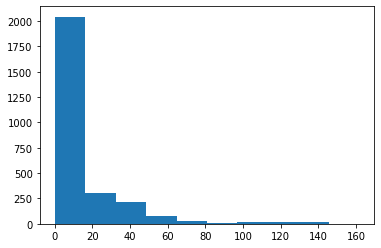

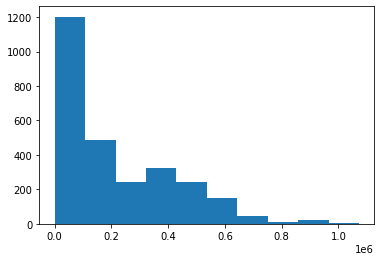

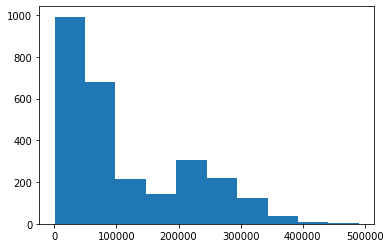

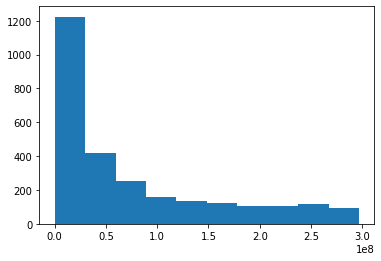

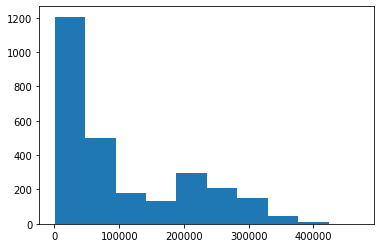

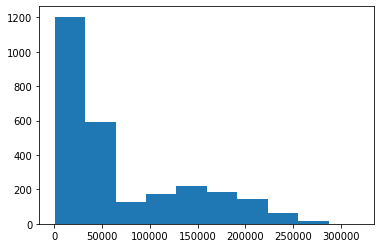

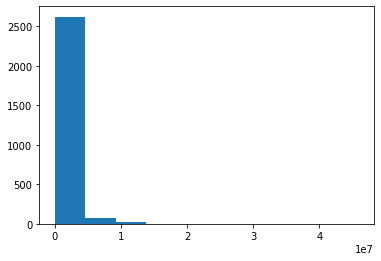

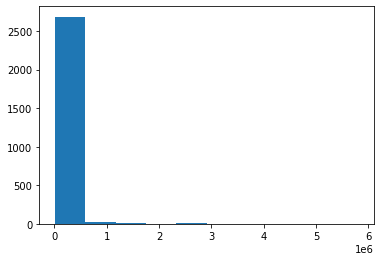

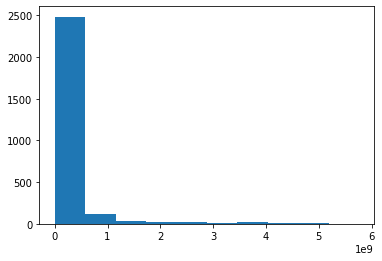

In [ ]:
print("For better vizulation plotting all histogram graphs as ordered.Only missing column is Date")
for i in df1.columns:
    plt.figure()
    plt.hist(df1[i])

In [ ]:
#After looked at all histogram graph we can not see any outliers because even the smaller numbers at the right side of graph,
#even they have connections with the whole column.

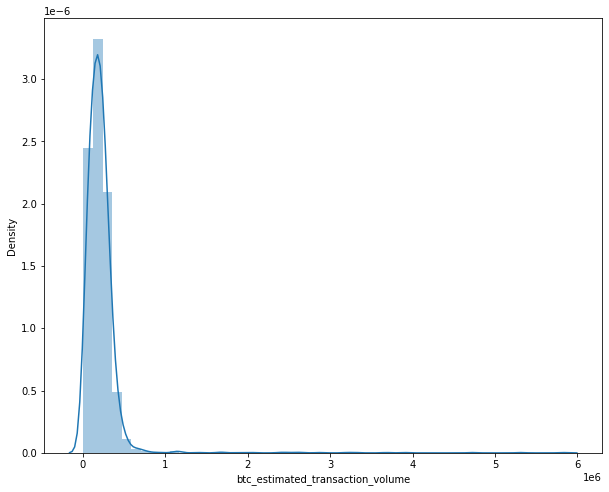

In [ ]:
#Displaying random features and comments
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['btc_estimated_transaction_volume'])
#We can see than our Estimated Transaction volume graph is right skewed and no outliers in the column

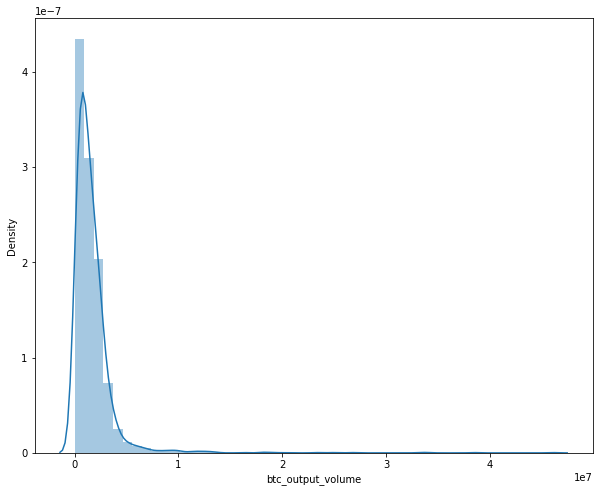

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['btc_output_volume'])
#Like the above graph our Output Volume graph is right skewed and no outliers in the column.

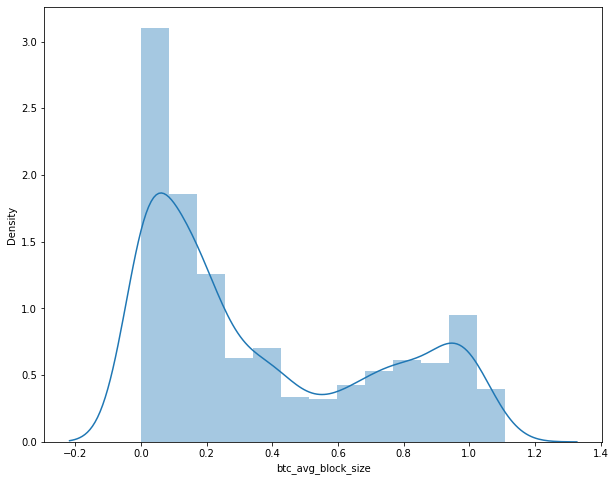

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['btc_avg_block_size'])
#Average block size are distributed better than the other features. Most of the block size distrubuted near at 0.

In [ ]:
# After the droping the 0 prices at Btc_market_price column. It is starting from 0,07690
display(Y)

0           0.076900
1           0.074000
2           0.068800
3           0.066700
4           0.066899
            ...     
2720    11524.776670
2721    11765.710000
2722    11212.655000
2723    10184.061670
2724    10125.013330
Name: btc_market_price, Length: 2725, dtype: float64

In [ ]:
# Now, as data preprocessing is completed. We can move on with spitting data to train,valid,test sets.
# 60-20-20
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.2, random_state=0,shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=0, shuffle=True)

In [ ]:
print("x_train:",X_train.shape), print("y_train: ",Y_train.shape)
print("x_valid: ",X_valid.shape), print("y_valid: ",Y_valid.shape)
print("x_test: ",X_test.shape), print("y_test: ",Y_test.shape)

x_train: (1635, 21)
y_train:  (1635,)
x_valid:  (545, 21)
y_valid:  (545,)
x_test:  (545, 21)
y_test:  (545,)


(None, None)

# KNN

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
# Elbow function to find the minimum MSE index
def elbow(X_train,Y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        error_rate.append(mse(Y_valid,prediction_knn))
    min_error = min(error_rate)
    optimal = error_rate.index(min_error)
    return optimal+1

In [ ]:
print("(L1)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,1))
print("(L2)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,2))

(L1)Optimal value for k is:  2
(L2)Optimal value for k is:  4


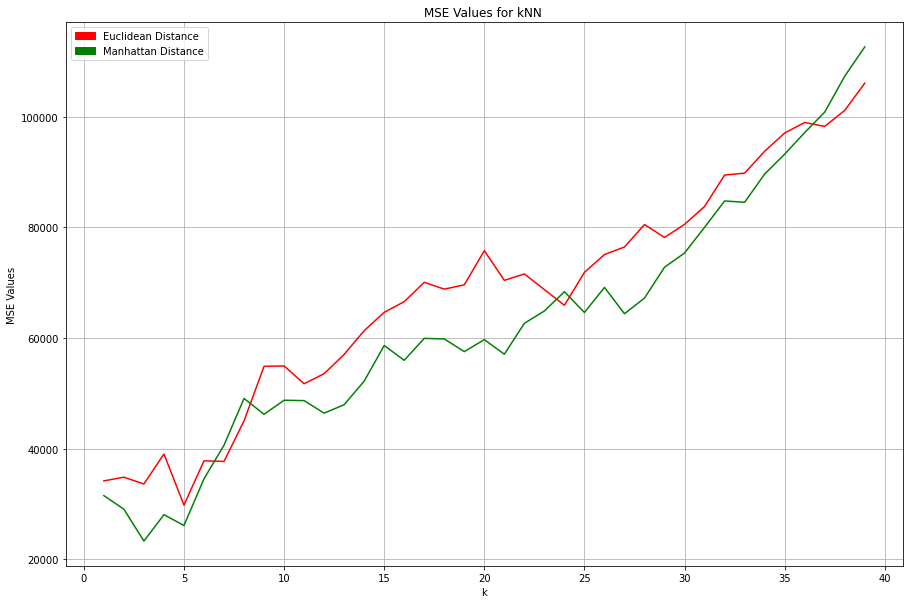

In [ ]:
# Elbow function to plot a graph.
def graph(x_train,y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        error_rate.append(mse(Y_valid,prediction_knn))
    return error_rate
K = range(1,40)
plt.figure(figsize=(15, 10))
plt.plot(K, graph(X_train,Y_train,X_valid,Y_valid,2) ,color='r')
plt.plot(K, graph(X_train,Y_train,X_valid,Y_valid,1) ,color='g')
plt.xlabel('k')
plt.ylabel('MSE Values')
plt.title('MSE Values for kNN ')
red_patch = mpatches.Patch(color='r', label='Euclidean Distance')
green_patch = mpatches.Patch(color='g', label='Manhattan Distance')
plt.legend(handles=[red_patch,green_patch])
plt.grid()
plt.show()

In [38]:
# writing MSE of manhattan and euclidean disctance
print("For chosing right metric lets look at the values when optimal k value is 2 AND 4.")
print("###########################################################################")
neighbors = KNN(n_neighbors=2,p=1)
neighbors.fit(X_train, Y_train)
prediction_knn = neighbors.predict(X_test)
result_manhattan = mse(Y_test,prediction_knn)
print("For Manhattan distance our value is (n_neighbors=2,p=1): ",result_manhattan)
neighbors = KNN(n_neighbors=4,p=2)
neighbors.fit(X_train, Y_train)
prediction_knn = neighbors.predict(X_test)
result_euclid = mse(Y_test,prediction_knn)
print("For Euclidean distance our value is (n_neighbors=4,p=2): ",result_euclid)
print("We can see that Manhattan Distance value is smaller than the Euclidean Distance value")

For chosing right metric lets look at the values when optimal k value is 2 AND 4.
###########################################################################
For Manhattan distance our value is (n_neighbors=2,p=1):  26502.448430426506
For Euclidean distance our value is (n_neighbors=4,p=2):  31092.9184968803
We can see that Manhattan Distance value is smaller than the Euclidean Distance value


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
# making a linear regression prediction model
linear_regression = LinearRegression()
# fitting it
linear_regression.fit(X_train,Y_train)
print('Testing Score: ', round(linear_regression.score(X_test,Y_test)*100,2), "%")

Testing Score:  99.32 %


In [ ]:
# predict values of test data with linear regression
y_pred=linear_regression.predict(X_test)
pred_df = pd.DataFrame({'Predicted Prices':y_pred,'Real price':Y_test})
pred_df.head(10)

,Predicted Prices,Real price
2220,488.116831,612.084737
332,-51.821748,14.300000
195,13.932249,0.949231
1399,738.637914,595.000000
923,-41.981475,30.250010
1958,504.174988,418.460000
776,16.130312,12.481000
1492,568.679346,448.000000
1266,887.387715,813.800000
2286,816.584328,750.030875


In [ ]:
from sklearn.model_selection import cross_val_score
# accuracy of linear regression model
lr_scores = cross_val_score(linear_regression, X_test,Y_test,scoring="r2",  cv=25)
print("cross validation values:\n" + str(lr_scores))
print("accuracy: " + str(lr_scores.mean()))

cross validation values:
[0.92699357 0.99182367 0.99878225 0.99403053 0.98535133 0.9831793
 0.98584456 0.96750961 0.99578122 0.88299581 0.99687411 0.99559783
 0.96618279 0.82563823 0.97070463 0.98791659 0.9920031  0.9623565
 0.99522875 0.98905622 0.99184037 0.98803853 0.9973507  0.99139543
 0.99990702]
accuracy: 0.9744953058935646


In [ ]:
# accuracy of KNN
knn_scores = cross_val_score(neighbors, X_test, Y_test,scoring="r2", cv=25)
print("cross validation values:\n" + str(knn_scores))
print("accuracy: " + str(knn_scores.mean()))

cross validation values:
[0.98678288 0.97745214 0.99251285 0.88715644 0.91795497 0.97407357
 0.97564448 0.99541742 0.97387187 0.98736413 0.90283842 0.98288549
 0.80882487 0.94057433 0.99418436 0.99573035 0.95819405 0.98710664
 0.99622982 0.95231762 0.98199491 0.94008601 0.99943365 0.98216313
 0.99839189]
accuracy: 0.9635674517725292


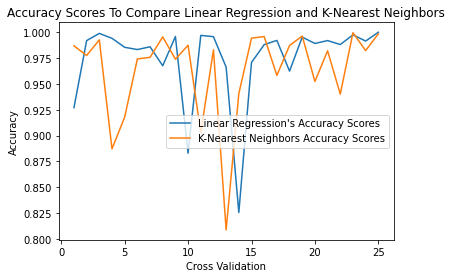

In [ ]:
# plotting linear regression's accuracy for different cross validation values
plt.plot(list(range(1,26)), lr_scores, label = "Linear Regression's Accuracy Scores")
# plotting knn's accuracy for different cross validation values
plt.plot(list(range(1,26)), knn_scores, label = "K-Nearest Neighbors Accuracy Scores")
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores To Compare Linear Regression and K-Nearest Neighbors")
plt.legend()
plt.show()

In [ ]:
# plotting Accuracy of Linear Regression Function
def linearRegression(X_train,Y_train,X_test,Y_test):
    linmod2 = LinearRegression()
    linmod2.fit(X_train,Y_train)
    y_pred = linmod2.predict(X_test)
    ax = sns.scatterplot(x=Y_test,y=Y_test,color='red')
    ax = sns.scatterplot(x=Y_test,y=y_pred,color = 'blue')
    ax.legend(["Original Values","Predicted Values"],loc = 'upper left')
    rmse = mse(Y_test, y_pred,squared = False)
    plt.show()
    print("\n")
    print(" Linear Regression R- Squared Value: ",r2_score(Y_test,y_pred)) 
    print("\n")

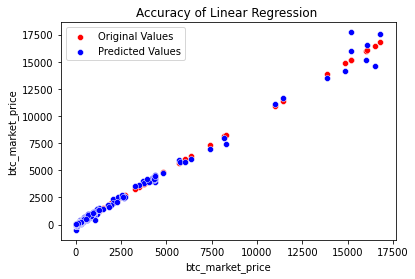



 Linear Regression R- Squared Value:  0.9932149847267131




In [ ]:
plt.title("Accuracy of Linear Regression ")
linearRegression(X_train,Y_train,X_test,Y_test) 
#As figure shows at the lower BTC prices our model is doing better job. Wıth the increse of price our model predicting less accurate prices.

In [ ]:
#We do not used precision and recall graphics because we predicted our values by Linear Regression.
# Precision and recall gives information about classification. But we interested in prices in decimals.